#Bagging & Boosting KNN & Stacking Assignment
#Q1.  What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
Ans. **Fundamental Idea:**
Ensemble techniques combine multiple models (weak learners) to produce a stronger and more accurate model. The goal is to reduce errors due to bias, variance, or both, by leveraging the collective predictions of several models instead of relying on a single one.

**Bagging (Bootstrap Aggregating):**

* **Approach:** Trains multiple models independently on different random subsets (bootstrapped samples) of the training data.

* **Objective:** Reduce variance and prevent overfitting.

* **Example:** Random Forest.

* **Key Idea:** Each model votes equally; final output is usually an average (for regression) or majority vote (for classification).

**Boosting:**

* **Approach:** Trains models sequentially, where each new model focuses on correcting the errors made by previous ones.

* **Objective:** Reduce bias and improve accuracy.

* **Example:** AdaBoost, Gradient Boosting, XGBoost.

* **Key Idea:** Models are weighted based on performance; misclassified examples get higher importance in subsequent iterations.
#Q2.  Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process?
Ans. **Explanation:**
A Random Forest Classifier reduces overfitting by combining the predictions of multiple decision trees trained on different random subsets of data and features. While a single decision tree tends to memorize training data (high variance), the random forest averages results from many trees, which smooths out individual errors and prevents overfitting.

**How it Reduces Overfitting**

1. **Bootstrap Sampling (Bagging):**
Each tree is trained on a random subset of the training data (with replacement). This ensures that no single tree sees all the data, reducing variance.

2. **Random Feature Selection:**
At each split, only a random subset of features is considered, which decorrelates the trees and prevents them from learning the same patterns.

3. **Averaging Predictions:**
Final prediction is based on majority voting (classification) or averaging (regression), which reduces noise and overfitting from individual trees.

**Two Key Hyperparameters:**

1. n_estimators (Number of Trees):

    * More trees → better averaging → lower variance and reduced overfitting.

    * However, too many trees can increase computation time without major accuracy gain.

2. max_features (Number of Features per Split):


    * Controls how many features are randomly selected for each split.

    * Smaller values increase tree diversity → reduces correlation → lowers overfitting.

    * Larger values make trees more similar → risk of overfitting increases.
#Q3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
Ans. **Definition:**

Stacking, also known as Stacked Generalization, is an ensemble learning technique that combines the predictions of multiple different models (called base learners) through another model called a meta-learner.
The meta-learner learns how to best combine the outputs of the base models to improve overall predictive performance.
**Differences from Traditional Bagging/Boosting:**
**Model Diversity:**
* **Bagging (e.g., Random Forest):** Typically uses homogeneous weak learners (e.g., decision trees) trained independently on different bootstrap samples of the data. The final prediction is an average or majority vote.
* **Boosting (e.g., AdaBoost, XGBoost):** Also uses homogeneous weak learners, but trains them sequentially, with each subsequent model focusing on correcting the errors of its predecessors.
* **Stacking:** Often combines heterogeneous strong learners (e.g., a logistic regression, a support vector machine, and a decision tree) as base models, aiming to capture different aspects of the data.
**Combination Method:**
* **Bagging:** Simple averaging or voting of predictions.
* **Boosting:** Weighted sum of predictions, where weights are determined by the performance of each sequential learner.
* **Stacking:** Uses a separate meta-model to learn the optimal way to combine the predictions of the base models. This meta-model can be any supervised learning algorithm (e.g., linear regression, logistic regression, or even a neural network).
**Training Process:**
* **Bagging:** Base models are trained in parallel.
* **Boosting:** Base models are trained sequentially.
* **Stacking:** Base models are trained independently, and then their predictions are used as features to train the meta-model. This often involves a cross-validation scheme to generate out-of-fold predictions for training the meta-model, preventing information leakage.

**Working Principle:**

* Several base models (e.g., Decision Tree, Logistic Regression, SVM) are trained on the same training dataset.

* Their predictions are collected on a validation set.

* A meta-model (e.g., Linear Regression or Gradient Boosting) is then trained on these predictions to produce the final output.

* This helps the ensemble capture different data patterns that individual models may miss.

**Example Use Case:**

**Loan Approval Prediction System**

* Base Models: Decision Tree, Logistic Regression, and Random Forest predict loan approval probabilities.

* Meta-Model: A Gradient Boosting Classifier takes the predictions of these models as input and learns the optimal combination for the final prediction.

#Q4.What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
Ans. **Definition:**
The OOB (Out-of-Bag) Score in a Random Forest is an internal validation metric that measures how well the model performs on unseen data.
When each decision tree in the Random Forest is trained using a bootstrap sample (a random sample with replacement), about one-third of the data is left out and not used in training that tree. These unused samples are called Out-of-Bag samples.

**Why It Is Useful:**

* The OOB Score provides an unbiased estimate of model accuracy.

* It allows model evaluation without needing a separate validation or test set, which is especially helpful when data is limited.

* It gives a quick way to check model performance during training.

**How It Helps in Model Evaluation:**

* For each data point, predictions are made only using the trees where that point was not included in the bootstrap sample.

* The model’s overall OOB prediction is obtained by averaging (for regression) or majority voting (for classification) over these trees.

* The OOB Score is then calculated as the proportion of correctly predicted samples across the entire dataset.
#Q5. Compare AdaBoost and Gradient Boosting in terms of:
#● How they handle errors from weak learners
#● Weight adjustment mechanism
#● Typical use cases

AnsAdaBoost and Gradient Boosting are both ensemble methods that combine multiple weak learners to create a strong learner, but they differ in their approach to handling errors, weight adjustment, and typical use cases.
**How they handle errors from weak learners:**
* **AdaBoost:** Focuses on misclassified samples. Subsequent weak learners are trained to correctly classify the samples that previous learners misclassified, by assigning higher weights to these samples. The "shortcomings" are identified by the high-weight data points.
* **Gradient Boosting:** Focuses on minimizing a loss function by iteratively fitting new weak learners to the residuals (the differences between the actual values and the predictions of the ensemble so far). The "shortcomings" are identified by the negative gradient of the loss function.
**Weight adjustment mechanism:**
* **AdaBoost:** Adjusts the weights of the individual data samples at each iteration. Misclassified samples receive increased weights, while correctly classified samples receive decreased weights, forcing subsequent learners to focus on the more challenging instances. It also assigns a weight to each weak learner based on its accuracy.
* **Gradient Boosting:** Adjusts the model itself to better fit the data. It does not directly adjust the weights of individual data samples in the same way AdaBoost does. Instead, it builds new weak learners that predict the residuals, effectively adjusting the overall model's prediction. The learning rate scales the contribution of each new weak learner.
**Typical use cases:**
* **AdaBoost:**
    * Binary classification problems.
    * Situations where simplicity and interpretability are valued, as it often uses simple decision stumps as weak learners.
    * Can be effective on smaller, noisy datasets.
* **Gradient Boosting:**
    * A wide range of classification and regression problems, including complex and non-linear relationships.
    * When high predictive accuracy is a primary goal.
    * Suitable for larger datasets and can utilize deeper decision trees as base learners.
    * Commonly used in competitive machine learning due to its flexibility and performance (e.g., XGBoost, LightGBM, CatBoost are gradient boosting variants).
#Q6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
Ans. **Reason for Good Performance:**

CatBoost (Categorical Boosting) is specifically designed to handle categorical features directly, without needing manual preprocessing steps such as one-hot encoding or label encoding.
It uses advanced techniques that convert categorical data into numerical form while preserving category relationships and avoiding target leakage.

**Handling of Categorical Variables:**

1. **Target-Based Encoding (Mean Encoding):**

    * CatBoost replaces each categorical value with the average target value for that category.

    * For example, if a feature is “City” and the target is “Will Buy = Yes/No,” CatBoost computes the mean probability of “Yes” for each city.

2. **Ordered Encoding to Prevent Target Leakage:**

    * Unlike traditional mean encoding, CatBoost processes data in a random but ordered way, ensuring that the encoding for each row only uses information from previous rows, not from the entire dataset.

    * This prevents the model from “seeing the answer” (target leakage) during training.

3. **Combination of Features:**

    * CatBoost automatically creates combinations of categorical features to capture interactions and relationships between categories.



In [2]:
#Practical Question
'''
Q7.KNN Classifier Assignment: Wine Dataset Analysis with Optimization
**Task:**
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

Ans.
'''
# ==============================================
# Step 1: Import Required Libraries
# ==============================================
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ==============================================
# Step 2: Load Dataset
# ==============================================
data = load_wine()
X, y = data.data, data.target

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==============================================
# Step 3: KNN without Scaling (K=5)
# ==============================================
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

# ==============================================
# Step 4: Apply StandardScaler and Retrain KNN
# ==============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN With Standard Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# ==============================================
# Step 5: GridSearchCV for Optimal K and Distance Metric
# ==============================================
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# ==============================================
# Step 6: Train Optimized KNN and Compare Results
# ==============================================
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


=== KNN Without Scaling ===
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN With Standard Scaling ===
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accura

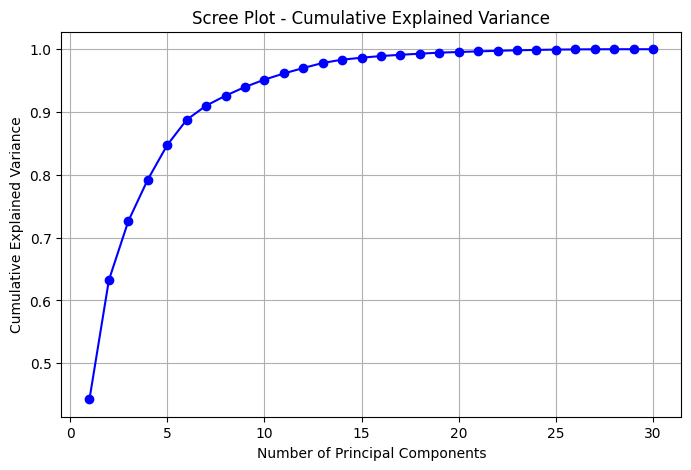


Number of components retained for 95% variance: 10

=== KNN on Original Data ===
Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


=== KNN on PCA-Transformed Data (95% Variance) ===
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



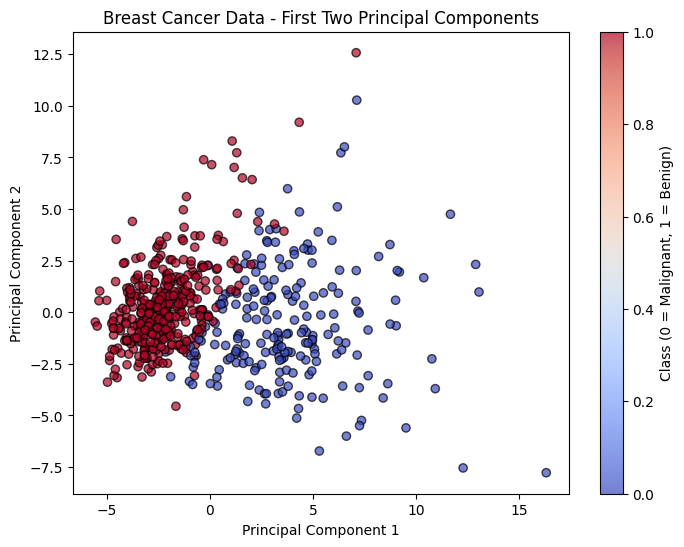

In [3]:
#Practical Question
'''
Q8.PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Ans
'''
# ==============================================
# Step 1: Import Required Libraries
# ==============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ==============================================
# Step 2: Load Dataset
# ==============================================
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the dataset before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================================
# Step 3: Apply PCA and Plot Scree Plot
# ==============================================
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio, marker='o', color='b')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# ==============================================
# Step 4: Retain 95% Variance and Transform Data
# ==============================================
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"\nNumber of components retained for 95% variance: {pca_95.n_components_}")

# ==============================================
# Step 5: Split Data (70% Train, 30% Test)
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# ==============================================
# Step 6: Train KNN on Original and PCA Data
# ==============================================
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# ==============================================
# Step 7: Compare Model Accuracies
# ==============================================
print("\n=== KNN on Original Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print(classification_report(y_test, y_pred_original))

print("\n=== KNN on PCA-Transformed Data (95% Variance) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# ==============================================
# Step 8: Visualization - First Two Principal Components
# ==============================================
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='coolwarm', edgecolor='k', alpha=0.7
)
plt.title("Breast Cancer Data - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()


=== KNN Regressor Comparison (K=5) ===
Euclidean Distance MSE: 4837.036
Manhattan Distance MSE: 5428.588


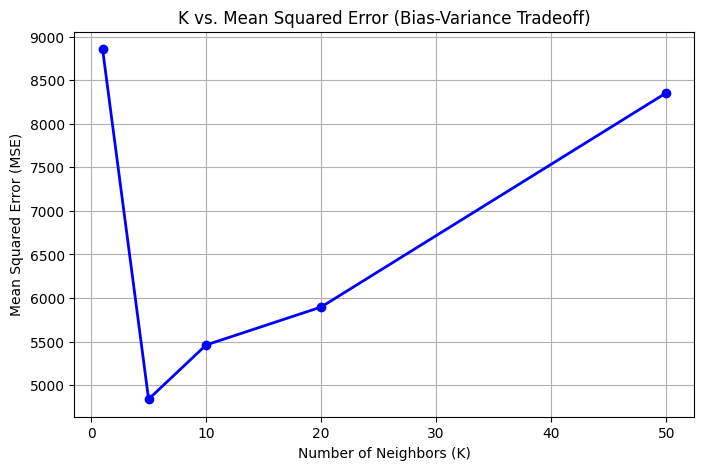


=== Observations ===
1. Euclidean vs Manhattan: The metric with lower MSE performs better.
2. As K increases, MSE first decreases (less variance) then increases (more bias).
3. Optimal K balances bias and variance for best generalization.


In [4]:
#Practical Question
'''
Q9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff

Ans.
'''
# ==============================================
# Step 1: Import Required Libraries
# ==============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ==============================================
# Step 2: Generate Synthetic Regression Dataset
# ==============================================
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================
# Step 3: Train KNN Regressor (Euclidean vs Manhattan)
# ==============================================
# (a) Euclidean distance
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# (b) Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Compare MSE
print("=== KNN Regressor Comparison (K=5) ===")
print(f"Euclidean Distance MSE: {mse_euclidean:.3f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.3f}")

# ==============================================
# Step 4: Analyze Bias-Variance Tradeoff (Different K values)
# ==============================================
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', color='b', linewidth=2)
plt.title("K vs. Mean Squared Error (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# ==============================================
# Step 5: Observations
# ==============================================
print("\n=== Observations ===")
print("1. Euclidean vs Manhattan: The metric with lower MSE performs better.")
print("2. As K increases, MSE first decreases (less variance) then increases (more bias).")
print("3. Optimal K balances bias and variance for best generalization.")


Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== KNN Comparison (Brute, KD-Tree, Ball Tree) ===
BRUTE      | Accuracy: 0.7446 | Time: 0.0159 sec
KD_TREE    | Accuracy: 0.7446 | Time: 0.0082 sec
BALL_TREE  | Accuracy: 0.7446 | Time: 0.0075 sec

Best Performing Method: BRUTE

Top 2 important features: ['BMI', 'Glucose']


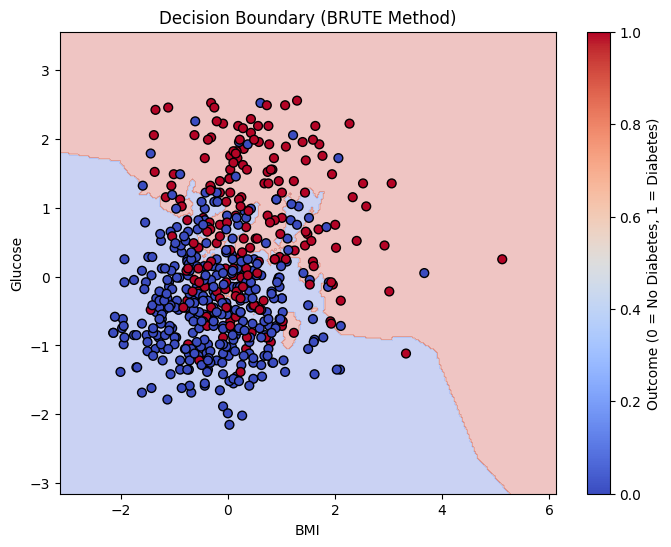

In [5]:
#Practical Question
'''
Q10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

Ans

'''
# ==============================================
# Step 1: Import Required Libraries
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif

# ==============================================
# Step 2: Load the Pima Indians Diabetes Dataset
# ==============================================
# Dataset source (UCI Pima Indians Diabetes)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
data = pd.read_csv(url, names=columns)

print("Dataset shape:", data.shape)
print(data.head())

# ==============================================
# Step 3: Handle Missing Values Using KNN Imputer
# ==============================================
# In this dataset, some zero values are biologically impossible (missing indicators)
features_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in features_with_missing:
    data[col] = data[col].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# ==============================================
# Step 4: Split Dataset and Standardize
# ==============================================
X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================
# Step 5: Train KNN using Different Algorithms
# ==============================================
methods = ["brute", "kd_tree", "ball_tree"]
results = {}

for method in methods:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end_time = time.time()

    acc = accuracy_score(y_test, y_pred)
    results[method] = {
        "Accuracy": acc,
        "Time": end_time - start_time
    }

# Display results
print("\n=== KNN Comparison (Brute, KD-Tree, Ball Tree) ===")
for method, metrics in results.items():
    print(f"{method.upper():<10} | Accuracy: {metrics['Accuracy']:.4f} | Time: {metrics['Time']:.4f} sec")

# Identify best method
best_method = max(results, key=lambda x: results[x]["Accuracy"])
print(f"\nBest Performing Method: {best_method.upper()}")

# ==============================================
# Step 6: Feature Importance (Select 2 for Plotting)
# ==============================================
mi = mutual_info_classif(X_train_scaled, y_train)
important_features = np.argsort(mi)[-2:]  # top 2 features
print("\nTop 2 important features:", X.columns[important_features].tolist())

# ==============================================
# Step 7: Decision Boundary Visualization
# ==============================================
# Re-train using only the 2 most important features
X_train_2 = X_train_scaled[:, important_features]
X_test_2 = X_test_scaled[:, important_features]

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train_2, y_train)

# Create mesh grid
x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=40)
plt.title(f"Decision Boundary ({best_method.upper()} Method)")
plt.xlabel(X.columns[important_features[0]])
plt.ylabel(X.columns[important_features[1]])
plt.colorbar(label="Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()
